In [1]:
import numpy as np
%matplotlib inline
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns



In [2]:
data = pd.read_csv('citrus.csv')
data_labels = data.iloc[:, 0].values
data_features = data.iloc[:, 1:].values

fig = px.scatter_3d(df, x='red', y='green', z='blue', 
                    color='label',
                    title='3D Scatter Plot - red vs green vs blue color')
fig.show()

In [3]:
features = data_features
labels = data_labels

In [4]:
from sklearn.model_selection import train_test_split
from qiskit_algorithms.utils import algorithm_globals

algorithm_globals.random_seed = 123
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.8, random_state=algorithm_globals.random_seed
)

In [5]:
from qiskit.circuit.library import ZFeatureMap

num_features = features.shape[1]
num_features

5

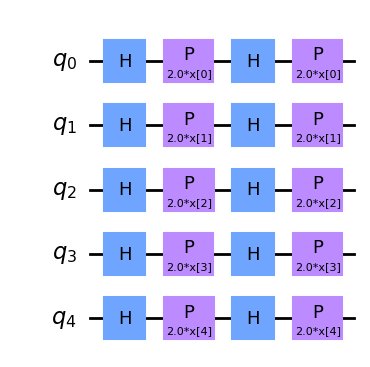

In [6]:
feature_map = ZFeatureMap(feature_dimension=num_features, reps=2)
feature_map.decompose().draw(output="mpl", style="clifford", fold=50)

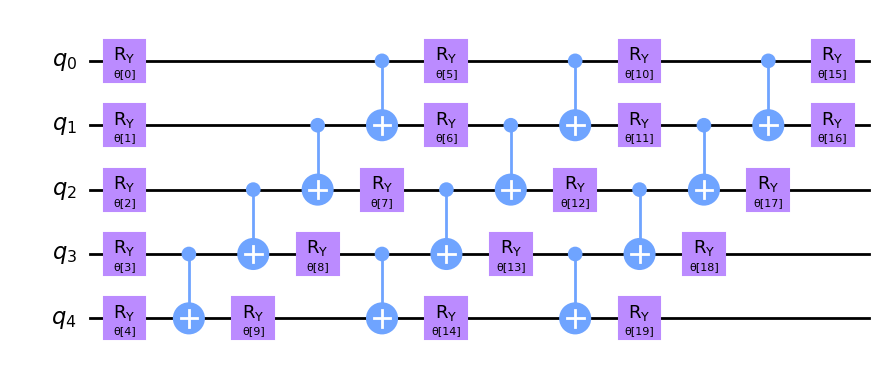

In [7]:
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", style="clifford", fold=50)

In [8]:
from qiskit_algorithms.optimizers import COBYLA

optimizer = COBYLA(maxiter=100)

In [9]:
from qiskit.primitives import Sampler

sampler = Sampler()

In [10]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

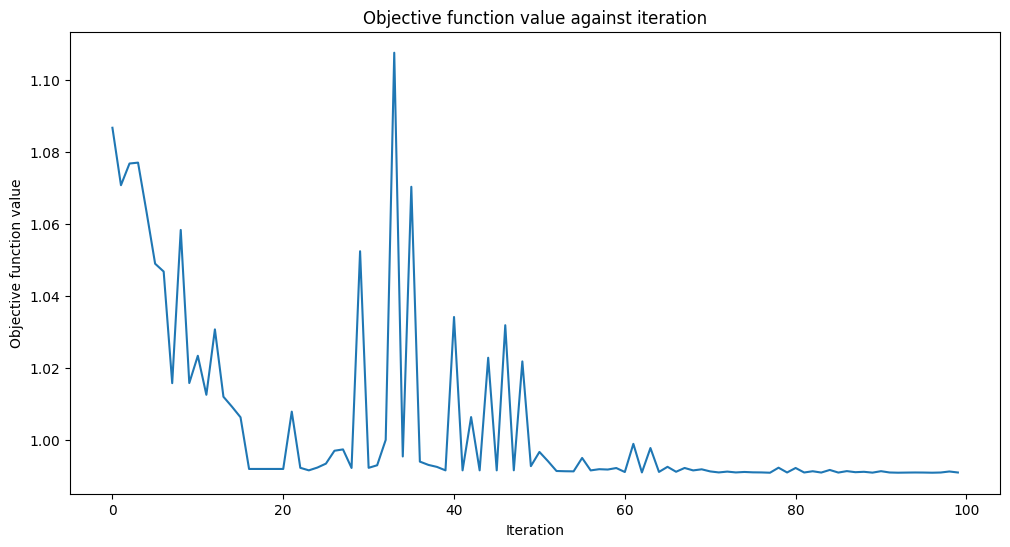

Training time: 2139 seconds


In [11]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [12]:
train_score_q4 = vqc.score(train_features, train_labels)
test_score_q4 = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.56
Quantum VQC on the test dataset:     0.56
